In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [66]:
train_dataset = pd.read_csv("train.csv")
test_dataset = pd.read_csv("test.csv")
test_dataset_first = test_dataset
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [67]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [68]:
train_dataset = train_dataset.drop(columns=['Id', 'Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'GarageArea'])
train_dataset['LotFrontage'] = train_dataset['LotFrontage'].fillna(value=train_dataset['LotFrontage'].median())
train_dataset['MasVnrType'] = train_dataset['MasVnrType'].fillna(value="None")
train_dataset['MasVnrArea'] = train_dataset['MasVnrArea'].fillna(value=0.0)
train_dataset['Electrical'] = train_dataset['Electrical'].fillna(value=train_dataset['Electrical'].mode()[0])
train_dataset = train_dataset.dropna(subset=['BsmtExposure', 'BsmtFinType2'])

test_dataset = test_dataset.drop(columns=['Id', 'Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'GarageArea'])
test_dataset['LotFrontage'] = test_dataset['LotFrontage'].fillna(value=test_dataset['LotFrontage'].median())
test_dataset['MasVnrType'] = test_dataset['MasVnrType'].fillna(value="None")
test_dataset['MasVnrArea'] = test_dataset['MasVnrArea'].fillna(value=0.0)
test_dataset = test_dataset.fillna(train_dataset.mode().iloc[0])

In [69]:
test_dataset.isna().any().any()

np.False_

In [70]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in train_dataset.select_dtypes(include=['object']).columns:
    train_dataset[col] = le.fit_transform(train_dataset[col])
for col in test_dataset.select_dtypes(include=['object']).columns:
    test_dataset[col] = le.fit_transform(test_dataset[col])

In [71]:
train_target = train_dataset.SalePrice
corr_matrix = train_dataset.corr()
train_dataset = train_dataset.drop(columns=['SalePrice'])
train_dataset

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,65.0,8450,1,3,3,0,4,0,...,61,0,0,0,0,0,2,2008,8,4
1,20,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,0,0,5,2007,8,4
2,60,3,68.0,11250,1,0,3,0,4,0,...,42,0,0,0,0,0,9,2008,8,4
3,70,3,60.0,9550,1,0,3,0,0,0,...,35,272,0,0,0,0,2,2006,8,0
4,60,3,84.0,14260,1,0,3,0,2,0,...,84,0,0,0,0,0,12,2008,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,62.0,7917,1,3,3,0,4,0,...,40,0,0,0,0,0,8,2007,8,4
1456,20,3,85.0,13175,1,3,3,0,4,0,...,0,0,0,0,0,0,2,2010,8,4
1457,70,3,66.0,9042,1,3,3,0,4,0,...,60,0,0,0,0,2500,5,2010,8,4
1458,20,3,68.0,9717,1,3,3,0,4,0,...,0,112,0,0,0,0,4,2010,8,4


In [72]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1421 entries, 0 to 1459
Data columns (total 68 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1421 non-null   int64  
 1   MSZoning       1421 non-null   int64  
 2   LotFrontage    1421 non-null   float64
 3   LotArea        1421 non-null   int64  
 4   Street         1421 non-null   int64  
 5   LotShape       1421 non-null   int64  
 6   LandContour    1421 non-null   int64  
 7   Utilities      1421 non-null   int64  
 8   LotConfig      1421 non-null   int64  
 9   LandSlope      1421 non-null   int64  
 10  Neighborhood   1421 non-null   int64  
 11  Condition1     1421 non-null   int64  
 12  Condition2     1421 non-null   int64  
 13  BldgType       1421 non-null   int64  
 14  HouseStyle     1421 non-null   int64  
 15  OverallQual    1421 non-null   int64  
 16  OverallCond    1421 non-null   int64  
 17  YearBuilt      1421 non-null   int64  
 18  YearRemodAdd 

In [73]:
train_dataset.isna().any().any()

np.False_

In [74]:
X_train, X_test, y_train, y_test = train_test_split(train_dataset, train_target, test_size=0.4, random_state=42)

In [75]:
from yellowbrick.model_selection import FeatureImportances
from sklearn.ensemble import RandomForestRegressor

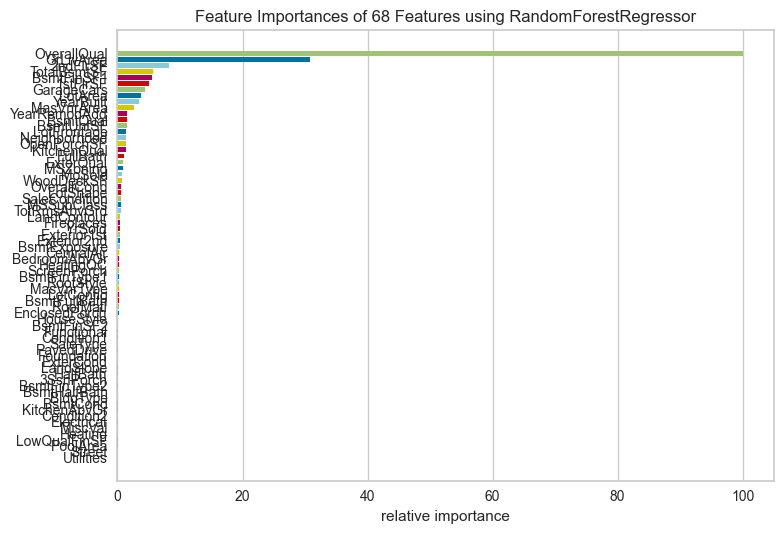

<Axes: title={'center': 'Feature Importances of 68 Features using RandomForestRegressor'}, xlabel='relative importance'>

In [76]:
viz = FeatureImportances(RandomForestRegressor(), labels=train_dataset.columns)
viz.fit(X_train, y_train)
viz.show()

SalePrice       1.000000
OverallQual     0.787695
GrLivArea       0.709565
GarageCars      0.642471
ExterQual       0.641172
1stFlrSF        0.613494
BsmtQual        0.611274
TotalBsmtSF     0.611245
KitchenQual     0.595659
FullBath        0.573319
TotRmsAbvGrd    0.542776
YearBuilt       0.518284
YearRemodAdd    0.499826
MasVnrArea      0.469635
Fireplaces      0.460884
Foundation      0.455356
HeatingQC       0.399053
BsmtFinSF1      0.371384
LotFrontage     0.334925
WoodDeckSF      0.317157
2ndFlrSF        0.314374
Name: SalePrice, dtype: float64


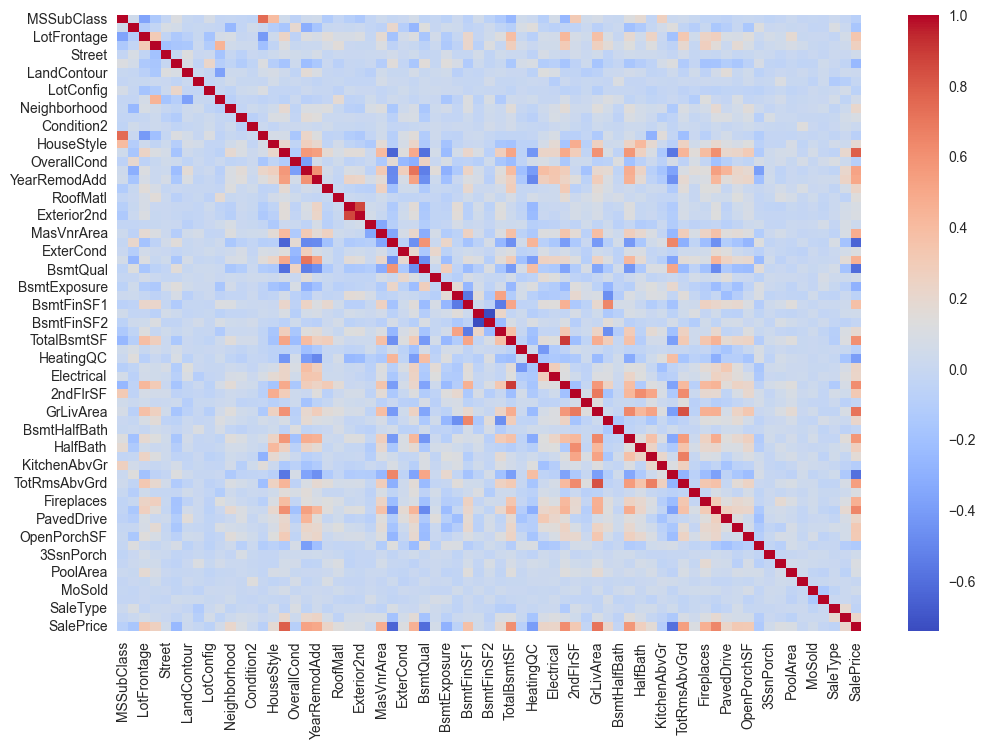

In [77]:
sorted_matrix = corr_matrix["SalePrice"].abs().sort_values(ascending=False).head(21)
print(sorted_matrix)
features = sorted_matrix.index[1:]
# Визуализация
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.show()

In [78]:
X_train = X_train[features]
X_test = X_test[features]
test_dataset = test_dataset[features]

In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)
test_dataset_std = sc.transform(test_dataset)

In [80]:
# param_grid = {
#     'n_estimators': [300, 400, 500],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [10, 20, 30],
#     'min_samples_leaf': [1, 2]
# }
# rf = RandomForestRegressor(random_state=42)
# grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# grid_search.fit(train_dataset_std, train_target)
# print(grid_search.best_params_)

In [81]:
model = RandomForestRegressor(n_estimators=1000, random_state=42, max_depth=10, min_samples_leaf=1, min_samples_split=10)
model.fit(X_train_std, y_train)

RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=1000,
                      random_state=42)

In [82]:
from sklearn.metrics import root_mean_squared_error
pred_y_test = model.predict(X_test_std)
print(root_mean_squared_error(np.log(y_test), np.log(pred_y_test)))

0.1627804827729276


In [83]:
pred_y = model.predict(test_dataset_std)

In [84]:
pred_y

array([118880.92084314, 152109.9002683 , 188632.2271851 , ...,
       163308.47242019, 124157.65588144, 227536.70219963], shape=(1459,))

In [85]:
submission = pd.DataFrame({'Id': test_dataset_first['Id'], 'SalePrice': pred_y})

In [86]:
submission.to_csv("submission.csv", index=False)